- bookID: Unique identification number fro each book
- title: Name under which book was published
- authors: Name of the Authors of the book
- average_rating: Avarage rating of the book recevied in total.
- isbn: International standarded book number
- isbn13: 13 digit isbn to identify the book
- language_code: Primary Language of the book
- num_pages: Number of pages the book containes
- ratings_count: Total Number of ratings the book recevied.
- text_reviews_count: Total number of written reviews recevied.
- publication_date: Date when the book was first published
- publisher: Name of the Pulishers

In [33]:
import pandas as pd
import numpy as np

# for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import re



In [ ]:
df = pd.read_csv(r"KNNBookRec\dataset\books.csv", on_bad_lines = 'skip')

In [35]:
df.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [36]:
df.shape

(11123, 12)

In [37]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [38]:
df.columns = df.columns.str.strip()

In [39]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [40]:
df.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

In [41]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [42]:
df.describe(include = 'object')

,title,authors,isbn,language_code,publication_date,publisher
count,11123,11123,11123,11123,11123,11123
unique,10348,6639,11123,27,3679,2290
top,The Iliad,Stephen King,0439785960,eng,10/1/2005,Vintage
freq,9,40,1,8908,56,318


In [43]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [44]:
df.duplicated().any()

False

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7   num_pages           11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


# Feature Engineering

- Extract Important Features
- Reducing the size of Features
- Creating new features from the existring ones

In [46]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [47]:
df.isbn.nunique()



11123

In [48]:
df.isbn13.nunique()

11123

In [49]:
df.drop(['bookID', 'isbn', 'isbn13','text_reviews_count'], axis = 1, inplace = True)

In [50]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'publication_date', 'publisher'],
      dtype='object')

In [51]:
df[['publication_date']]

,publication_date
0,9/16/2006
1,9/1/2004
2,11/1/2003
3,5/1/2004
4,9/13/2004
...,...
11118,12/21/2004
11119,12/1/1988
11120,8/1/1993
11121,2/27/2007


In [52]:
df['year'] = df['publication_date'].str.split('/')
df['year'] = df['year'].apply(lambda x: x[2])

In [53]:
df.head(2)

,title,authors,average_rating,language_code,num_pages,ratings_count,publication_date,publisher,year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,9/16/2006,Scholastic Inc.,2006
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,9/1/2004,Scholastic Inc.,2004


In [54]:
df.dtypes

title                object
authors              object
average_rating      float64
language_code        object
num_pages             int64
ratings_count         int64
publication_date     object
publisher            object
year                 object
dtype: object

In [55]:
df['year'] = df['year'].astype('int')

In [56]:
df.dtypes

title                object
authors              object
average_rating      float64
language_code        object
num_pages             int64
ratings_count         int64
publication_date     object
publisher            object
year                  int32
dtype: object

In [57]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'publication_date', 'publisher', 'year'],
      dtype='object')

In [58]:
df['year'].min()

1900

In [59]:
df['year'].max()

2020

In [60]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'publication_date', 'publisher', 'year'],
      dtype='object')

In [61]:
df['authors'] = df['authors'].str.split('/').str[0]


In [62]:
df.head(5)

,title,authors,average_rating,language_code,num_pages,ratings_count,publication_date,publisher,year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,eng,652,2095690,9/16/2006,Scholastic Inc.,2006
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,eng,870,2153167,9/1/2004,Scholastic Inc.,2004
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,11/1/2003,Scholastic,2003
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,eng,435,2339585,5/1/2004,Scholastic Inc.,2004
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling,4.78,eng,2690,41428,9/13/2004,Scholastic,2004


# Exploratory Data Analysis

In [63]:
df[df['year'] == 2020][['title', 'authors','average_rating','language_code','publisher' ]]

,title,authors,average_rating,language_code,publisher
9664,A Quick Bite (Argeneau #1),Lynsay Sands,3.91,eng,Avon


In [64]:
df.groupby(['year'])['title'].agg('count').sort_values(ascending = False).head(10)

year
2006    1700
2005    1260
2004    1069
2003     931
2002     798
2001     656
2000     534
2007     518
1999     450
1998     396
Name: title, dtype: int64

In [65]:
df['year'].max()

2020

In [66]:
df.tail(5)

,title,authors,average_rating,language_code,num_pages,ratings_count,publication_date,publisher,year
11118,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann,4.06,eng,512,156,12/21/2004,Da Capo Press,2004
11119,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783,12/1/1988,Penguin Books,1988
11120,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,415,820,8/1/1993,Penguin Books,1993
11121,Poor People,William T. Vollmann,3.72,eng,434,769,2/27/2007,Ecco,2007
11122,Las aventuras de Tom Sawyer,Mark Twain,3.91,spa,272,113,5/28/2006,Edimat Libros,2006


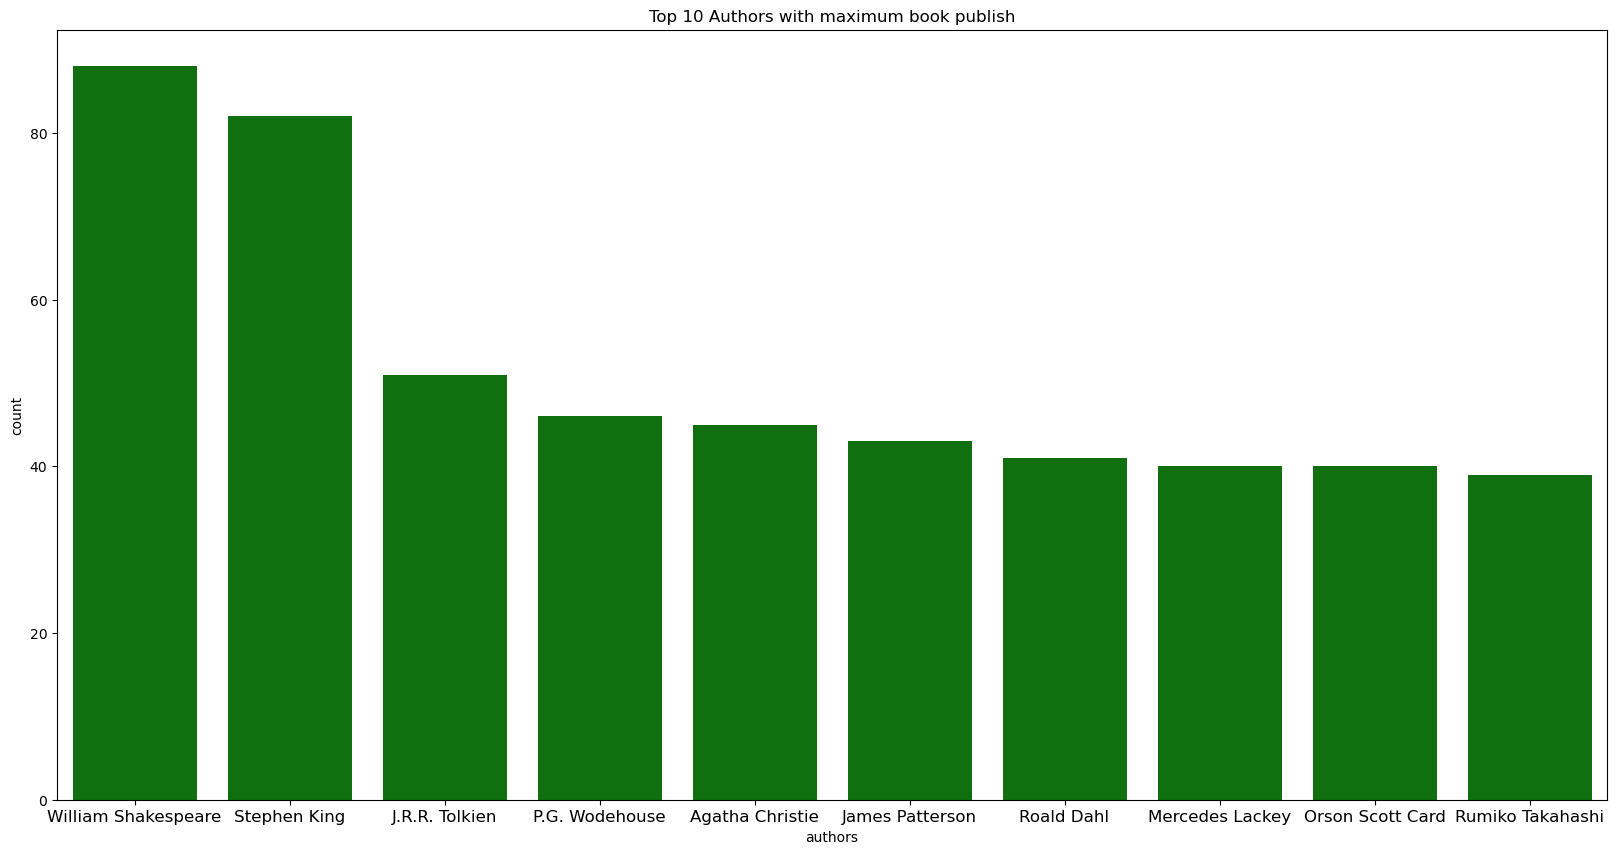

In [67]:
plt.figure(figsize = (20, 10))
sns.countplot(x = 'authors', data = df,
             order = df['authors'].value_counts().iloc[:10].index,color='green')
plt.title("Top 10 Authors with maximum book publish")
plt.xticks(fontsize = 12)
plt.show()

In [68]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'publication_date', 'publisher', 'year'],
      dtype='object')

In [69]:
df.language_code.value_counts()

language_code
eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: count, dtype: int64

In [71]:
df.groupby(['language_code'])[['average_rating', 
                               'ratings_count', 
                               ]].agg('mean').style.background_gradient(cmap = 'Wistia')


,average_rating,ratings_count
language_code,,
ale,4.360000,102.000000
ara,3.550000,122.000000
en-CA,4.025714,4086.714286
en-GB,3.923411,2463.691589
en-US,3.914659,3773.906960
eng,3.934062,21570.272564
enm,3.873333,3233.666667
fre,3.971528,3277.319444
ger,3.950101,234.727273


In [72]:
book = df['title'].value_counts()[:20]
book

title
The Iliad                     9
The Brothers Karamazov        9
The Odyssey                   8
Anna Karenina                 8
'Salem's Lot                  8
Gulliver's Travels            8
The Picture of Dorian Gray    7
A Midsummer Night's Dream     7
The Histories                 6
Macbeth                       6
Sense and Sensibility         6
Robinson Crusoe               6
Treasure Island               6
Jane Eyre                     6
Romeo and Juliet              6
Collected Stories             6
The Secret Garden             6
The Scarlet Letter            6
The Great Gatsby              6
Frankenstein                  5
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_9328\1454327419.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = book.index, y = book,


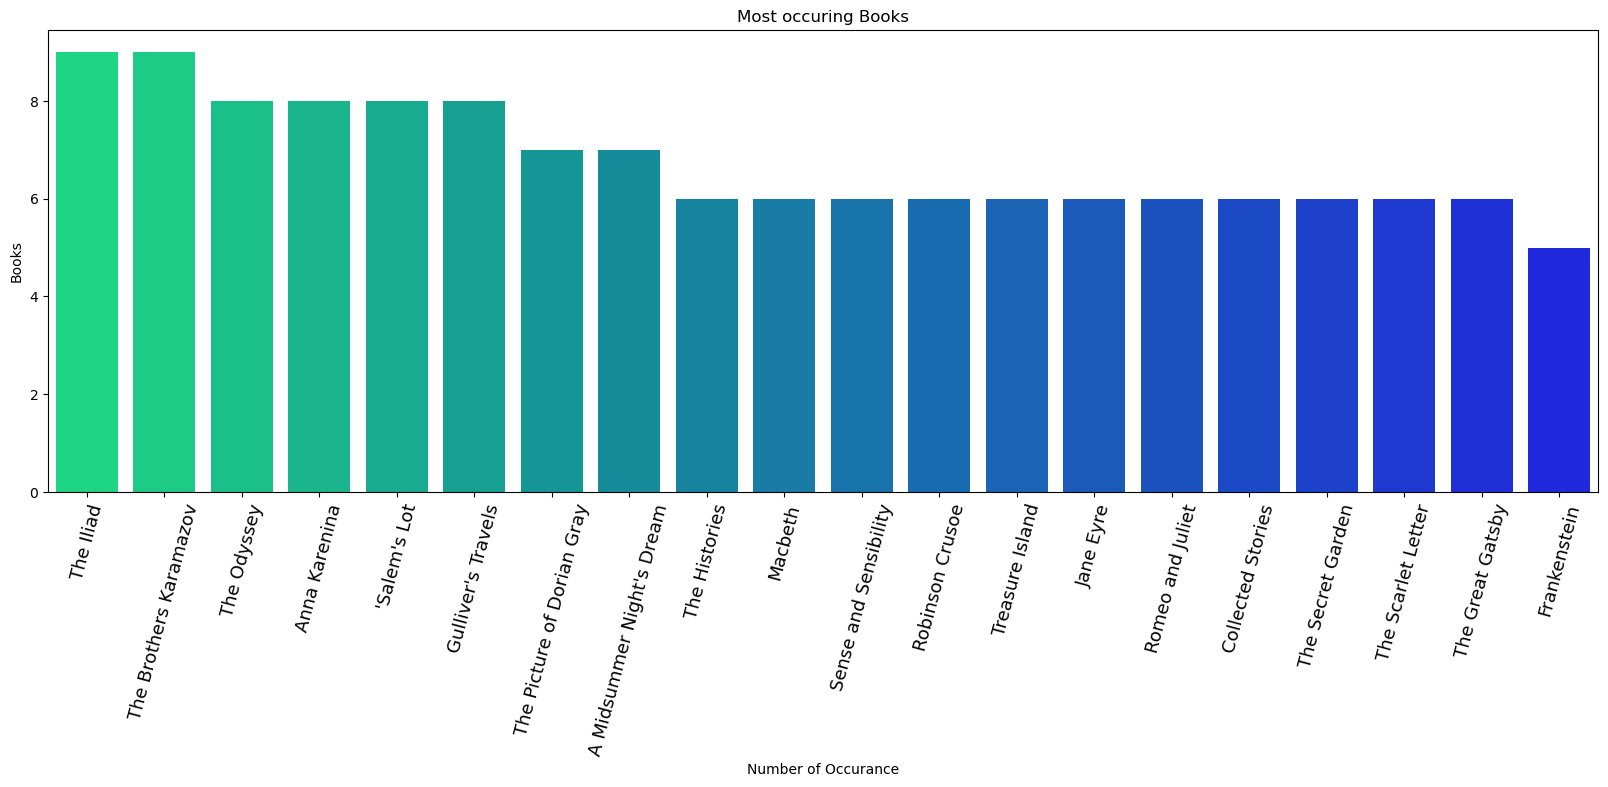

In [73]:
# to find most occuring book in our data
plt.figure(figsize = (20, 6))
book = df['title'].value_counts()[:20]
sns.barplot(x = book.index, y = book,
           palette = 'winter_r')
plt.title("Most occuring Books")
plt.xlabel("Number of Occurance")
plt.ylabel("Books")
plt.xticks(rotation = 75, fontsize = 13)
plt.show()


# sns.barplot(...): This function creates a bar plot.
# x=book.index: Sets the x-axis to display the book titles (the index of the book Series).
# y=book: Sets the y-axis to display the counts of occurrences.
# palette='winter_r': Specifies a color palette for the bars. The 'winter_r' palette provides a gradient of colors from blue to green.

C:\Users\user\AppData\Local\Temp\ipykernel_9328\3493288629.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['average_rating'])


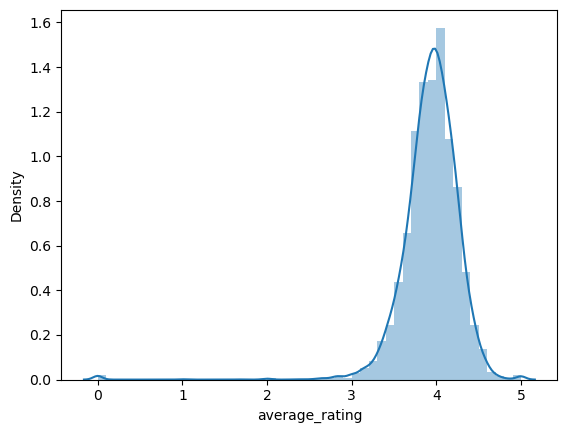

In [74]:
sns.distplot(df['average_rating'])
plt.show()

In [75]:
df[df.average_rating == df.average_rating.max()][['title','authors','language_code','publisher']]

,title,authors,language_code,publisher
624,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes,grc,Oxford University Press USA
786,Willem de Kooning: Late Paintings,Julie Sylvester,eng,Schirmer Mosel
855,Literature Circle Guide: Bridge to Terabithia:...,Tara MacCarthy,eng,Teaching Resources
1243,Middlesex Borough (Images of America: New Jersey),Middlesex Borough Heritage Committee,eng,Arcadia Publishing
4125,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,eng,BradyGames
4788,The Diamond Color Meditation: Color Pathway to...,John Diamond,eng,Square One Publishers
4933,Bulgakov's the Master and Margarita: The Text ...,Elena N. Mahlow,eng,Vantage Press
5023,The Complete Theory Fun Factory: Music Theory ...,Ian Martin,eng,Boosey & Hawkes Inc
5474,The Goon Show Volume 4: My Knees Have Fallen ...,NOT A BOOK,eng,BBC Physical Audio
5476,The Goon Show Volume 11: He's Fallen in the W...,NOT A BOOK,eng,BBC Physical Audio


In [76]:
publisher = df['publisher'].value_counts()[:20]
publisher

publisher
Vintage                         318
Penguin Books                   261
Penguin Classics                184
Mariner Books                   150
Ballantine Books                144
Harper Perennial                112
HarperCollins                   112
Pocket Books                    111
Bantam                          110
VIZ Media LLC                    88
Berkley                          86
Dover Publications               85
Modern Library                   82
Del Rey                          80
Tor Books                        76
Grand Central Publishing         76
Oxford University Press  USA     75
Oxford University Press          73
Scribner                         73
W. W. Norton  Company            68
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_9328\1869261625.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = publisher.index, y = publisher, palette = 'winter_r')


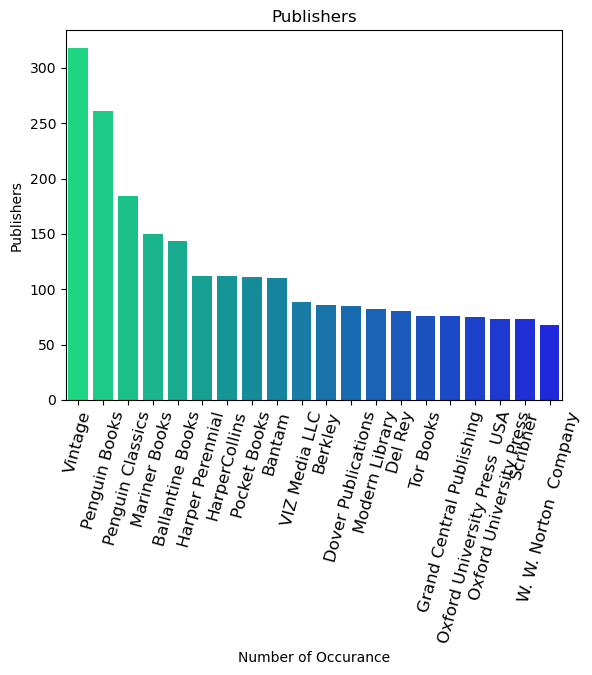

In [77]:
publisher = df['publisher'].value_counts()[:20]
sns.barplot(x = publisher.index, y = publisher, palette = 'winter_r')
plt.title("Publishers")
plt.xlabel("Number of Occurance")
plt.ylabel("Publishers")
plt.xticks(rotation = 75, fontsize = 12)
plt.show()

### Recommending Books based on Publishers
### Recommending Books based on Authors
### Recommending Books based on Language

In [79]:
# df.publisher.value_counts()
df[['publisher']].value_counts()

publisher                            
Vintage                                  318
Penguin Books                            261
Penguin Classics                         184
Mariner Books                            150
Ballantine Books                         144
                                        ... 
Doherty  Tom Associates  LLC               1
Dominion Press                             1
New York Review Children's Collection      1
New York : Penguin Books                   1
Lions                                      1
Name: count, Length: 2290, dtype: int64

In [80]:
df.to_csv(r'C:\Users\user\OneDrive\diug\OneDrive\Desktop\Book-Recommendation-system\dataset\cleaned_data.csv',index=False)


# Data Preprocessing

In [81]:
df= pd.read_csv(r"C:\Users\user\OneDrive\diug\OneDrive\Desktop\Book-Recommendation-system\dataset\cleaned_data.csv")

In [82]:
df.head(5)

,title,authors,average_rating,language_code,num_pages,ratings_count,publication_date,publisher,year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,eng,652,2095690,9/16/2006,Scholastic Inc.,2006
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,eng,870,2153167,9/1/2004,Scholastic Inc.,2004
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,11/1/2003,Scholastic,2003
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,eng,435,2339585,5/1/2004,Scholastic Inc.,2004
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling,4.78,eng,2690,41428,9/13/2004,Scholastic,2004


In [83]:
def num_to_obj(x):
    if x >0 and x <=1:
        return "between 0 and 1"
    if x > 1 and x <= 2:
        return "between 1 and 2"
    if x > 2 and x <=3:
        return "between 2 and 3"
    if x >3 and x<=4:
        return "between 3 and 4"
    if x >4 and x<=5:
        return "between 4 and 5"
df['rating_obj'] = df['average_rating'].apply(num_to_obj)

In [84]:
df['rating_obj'].value_counts()

rating_obj
between 3 and 4    6285
between 4 and 5    4735
between 2 and 3      69
between 1 and 2       7
between 0 and 1       2
Name: count, dtype: int64

In [8]:
rating_df = pd.get_dummies(df['rating_obj'])     #one hot encoding
rating_df.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5
0,False,False,False,False,True
1,False,False,False,False,True
2,False,False,False,False,True
3,False,False,False,False,True
4,False,False,False,False,True


In [9]:
df.drop(['text_reviews_count'],axis=1,inplace=True)

In [10]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'publication_date', 'publisher', 'year', 'rating_obj'],
      dtype='object')

In [11]:
language_df = pd.get_dummies(df['language_code'])
language_df.head()

,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,...,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
df[df['publisher']=='Scholastic Inc.'].count()

title               13
authors             13
average_rating      13
language_code       13
num_pages           13
ratings_count       13
publication_date    13
publisher           13
year                13
rating_obj          13
dtype: int64

In [13]:
df[df['title']=='The Secret Garden']

,title,authors,average_rating,language_code,num_pages,ratings_count,publication_date,publisher,year,rating_obj
910,The Secret Garden,Frances Hodgson Burnett,4.13,eng,331,764134,9/1/1998,Children's Classics,1998,between 4 and 5
911,The Secret Garden,Frances Hodgson Burnett/Sandra M. Gilbert,4.13,eng,281,1739,7/1/2003,Signet,2003,between 4 and 5
912,The Secret Garden,Martha Hailey DuBose/Frances Hodgson Burnett/L...,4.33,eng,160,1653,3/1/2005,Sterling,2005,between 4 and 5
913,The Secret Garden,Frances Hodgson Burnett/Alison Lurie,4.13,en-GB,288,517,1/30/2003,Penguin Classics,2003,between 4 and 5
9675,The Secret Garden,Frances Hodgson Burnett/Graham Rust,4.13,eng,298,254,6/1/1999,Scholastic,1999,between 4 and 5
9676,The Secret Garden,Frances Hodgson Burnett/Scott McKowen,4.13,eng,248,575,10/1/2004,Sterling,2004,between 4 and 5


In [14]:
publisher_df=pd.get_dummies(df['publisher'])
publisher_df.head(5)

,10/18,1st Book Library,1st World Library,A & C Black (Childrens books),A Harvest Book/Harcourt Inc.,A K PETERS,AA World Services,ACE,ADV Manga,AHA! Process,...,小学館,小学館 [Shōgakukan],時報出版,東立,皇冠文化出版有限公司,聯經出版事業股份有限公司,英文漢聲出版股份有限公司,角川書店 (Kadokawa Shoten),講談社,集英社
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
# Summing the one-hot encoded publisher DataFrame to get the count of books per publisher
publisher_counts = publisher_df.sum().sort_values(ascending=False)
print(publisher_counts)

Vintage                                  318
Penguin Books                            261
Penguin Classics                         184
Mariner Books                            150
Ballantine Books                         144
                                        ... 
Doherty  Tom Associates  LLC               1
Dominion Press                             1
New York Review Children's Collection      1
New York : Penguin Books                   1
Lions                                      1
Length: 2290, dtype: int64


In [31]:
outlier_rows = df[df['average_rating'] > 5]

# Display the rows with average_rating greater than 5
print("Rows with average_rating greater than 5:")
print(outlier_rows)

Rows with average_rating greater than 5:
Empty DataFrame
Columns: [title, authors, average_rating, language_code, num_pages, ratings_count, publication_date, publisher, year, rating_obj]
Index: []


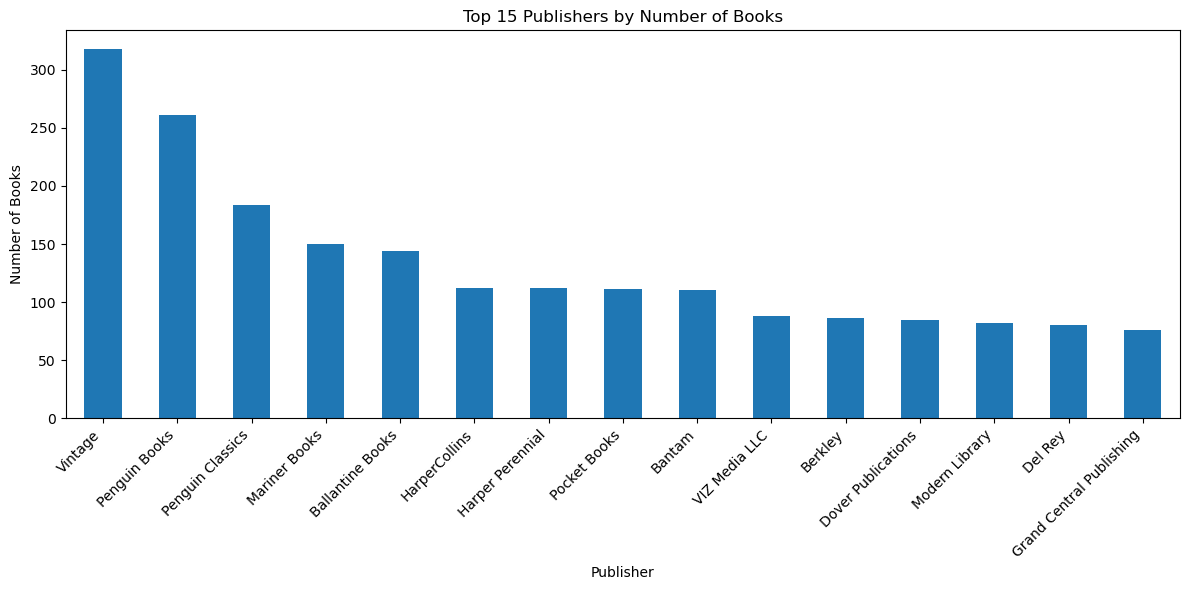

In [32]:
# Get the top 10 publishers
top_n = 15
top_publishers = publisher_counts.head(top_n)

# Plotting the top N publishers
plt.figure(figsize=(12, 6))
top_publishers.plot(kind='bar')
plt.title(f'Top {top_n} Publishers by Number of Books')
plt.xlabel('Publisher')
plt.ylabel('Number of Books')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
author_df=pd.get_dummies(df['authors'])
author_df.head(5)

,A.B. Yehoshua/Hillel Halkin,A.D.P. Briggs/Leo Tolstoy/Fyodor Dostoyevsky,A.E. Cunningham/Harlan Ellison/Charles F. Miller/Terry Dowling/Paul Rhoads/Jack Vance/Tom Shippey/Gene Wolfe/David Langford/Dan Simmons/David Mathew,A.J. Jacobs,A.M. Homes,A.N. Roquelaure/Anne Rice,A.S. Byatt,Abbie Hoffman/Anita Hoffman,Abdul Rahman Munif/Peter Theroux,Abigail Adams/Frank Shuffelton,...,Åsne Seierstad/Ingrid Christopherson,Émile Zola/Andrew Moore/Ernest Alfred Vizetelly,Émile Zola/Douglas Parmée,Émile Zola/Ernest Alfred Vizetelly,Émile Zola/Ernest Alfred Vizetelly/Henry Vizetelly,Émile Zola/Henri Mitterand,Émile Zola/Robert Lethbridge/Elinor Dorday,Émile Zola/Robin Buss/Brian Nelson,Émile Zola/Roger Pearson,Éric-Emmanuel Schmitt
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [85]:
df[df['authors']=='Donald A. Norman'].count()

title               3
authors             3
average_rating      3
language_code       3
num_pages           3
ratings_count       3
publication_date    3
publisher           3
year                3
rating_obj          3
dtype: int64

In [16]:
features = pd.concat([rating_df,language_df, df['average_rating'],
                    df['ratings_count'], df['title'],publisher_df,author_df], axis = 1)
features.set_index('title', inplace= True)
features.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5,ale,ara,en-CA,en-GB,en-US,...,Åsne Seierstad/Ingrid Christopherson,Émile Zola/Andrew Moore/Ernest Alfred Vizetelly,Émile Zola/Douglas Parmée,Émile Zola/Ernest Alfred Vizetelly,Émile Zola/Ernest Alfred Vizetelly/Henry Vizetelly,Émile Zola/Henri Mitterand,Émile Zola/Robert Lethbridge/Elinor Dorday,Émile Zola/Robin Buss/Brian Nelson,Émile Zola/Roger Pearson,Éric-Emmanuel Schmitt
title,,,,,,,,,,,,,,,,,,,,,
Harry Potter and the Half-Blood Prince (Harry Potter #6),False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Harry Potter and the Order of the Phoenix (Harry Potter #5),False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Harry Potter and the Chamber of Secrets (Harry Potter #2),False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Harry Potter and the Prisoner of Azkaban (Harry Potter #3),False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Harry Potter Boxed Set Books 1-5 (Harry Potter #1-5),False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


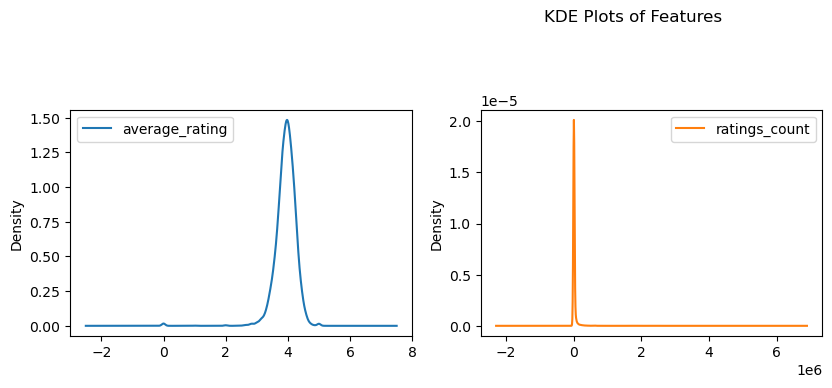

In [82]:
# Plot KDE for each numerical column
features.plot(kind='kde', subplots=True, layout=(3, 3), figsize=(15, 10), sharex=False)
plt.suptitle('KDE Plots of Features')
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [19]:
features_scaled

array([[-0.01341044, -0.02509428, -0.07900686, ..., -0.00948219,
        -0.01341044, -0.00948219],
       [-0.01341044, -0.02509428, -0.07900686, ..., -0.00948219,
        -0.01341044, -0.00948219],
       [-0.01341044, -0.02509428, -0.07900686, ..., -0.00948219,
        -0.01341044, -0.00948219],
       ...,
       [-0.01341044, -0.02509428, -0.07900686, ..., -0.00948219,
        -0.01341044, -0.00948219],
       [-0.01341044, -0.02509428, -0.07900686, ..., -0.00948219,
        -0.01341044, -0.00948219],
       [-0.01341044, -0.02509428, -0.07900686, ..., -0.00948219,
        -0.01341044, -0.00948219]])

# Model Building

In [20]:
from sklearn import neighbors

In [21]:
model = neighbors.NearestNeighbors(n_neighbors=10, algorithm = 'ball_tree',
                                  metric = 'euclidean')
model.fit(features_scaled)
dist, idlist = model.kneighbors(features_scaled)

In [22]:
df['title'].value_counts()

title
The Iliad                                               9
The Brothers Karamazov                                  9
The Odyssey                                             8
Anna Karenina                                           8
'Salem's Lot                                            8
                                                       ..
The Noonday Demon: An Atlas of Depression               1
The Noonday Demon: An Anatomy of Depression             1
My Secret: A PostSecret Book                            1
The Secret Lives of Men and Women: A PostSecret Book    1
Las aventuras de Tom Sawyer                             1
Name: count, Length: 10348, dtype: int64

In [1]:
import re 

def normalize_title(title):
    """ Normalize title by removing unwanted characters and converting to lowercase. """
    return re.sub(r'[^\w\s#():]', '', title).lower().strip()

def BookRecommender(book_name):
    book_list_info = []
    
    # Normalize input
    normalized_input = normalize_title(book_name)
    
    # Normalize dataset titles for comparison
    df['normalized_title'] = df['title'].apply(normalize_title)
    
    # Check if the input contains special characters
    if re.search(r'[^\w\s#():]', book_name):  # Check for any non-word character
        # Logic for inputs with symbols
        print("Input contains special characters.")
        book_id_row = df[df['normalized_title'].str.contains(re.escape(normalized_input), na=False, case=False)]
    else:
        # Logic for simple string inputs
        print("Input is a simple string.")
        book_id_row = df[df['normalized_title'].str.contains(re.escape(normalized_input), na=False, case=False)]
        
    if not book_id_row.empty:
        book_id = book_id_row.index[0]
        
        book_list_info.append(f"{df.iloc[book_id].title} by {df.iloc[book_id].authors}")
        
        # Assuming idlist is defined elsewhere in your code
        for newid in idlist[book_id]:
            if newid != book_id:
                recommended_title = df.iloc[newid].title
                recommended_author = df.iloc[newid].authors
                book_list_info.append(f"{recommended_title} by {recommended_author}")
                
    else:
        print(f"Book '{book_name}' not found in the database.")
    
    return book_list_info

# Example usage
recommendations = BookRecommender("Death Note  Vol. 4: 恋心 (Death Note  #4)")
print(recommendations)

NameError: name 'df' is not defined

In [93]:
def recommend_by_publisher(publisher_name):
    # Normalize the publisher name for consistency
    normalized_publisher = publisher_name.lower().strip()
    
    # Filter books by the specified publisher
    filtered_books = df[df['publisher'].str.lower() == normalized_publisher]
    
    # Check if any books are found for the publisher
    if filtered_books.empty:
        return [f"No books found for publisher '{publisher_name}'."]
    
    # Initialize an empty list to store recommended books
    book_list_info = []

    # For each book in the filtered list, find recommendations
    for index, row in filtered_books.iterrows():
        # Get the title of the book to access features
        book_title = row['title']

        # Check if the book title exists in the features DataFrame
        if book_title in features.index:
            # Get the features of the current book
            book_features = features.loc[book_title].values.reshape(1, -1)

            # Create a DataFrame from the features to preserve column names
            book_features_df = pd.DataFrame(book_features, columns=features.columns)

            # Scale the features for the k-NN model
            book_features_scaled = scaler.transform(book_features_df)

            # Get the k-nearest neighbors for the current book
            dist, idlist = model.kneighbors(book_features_scaled, n_neighbors=11)  # 10 neighbors + 1 for itself

            # Loop through the neighbors and add them to the recommendations
            for newid in idlist[0][1:]:  # Skip the first neighbor as it is the book itself
                recommended_title = features.index[newid]  # Get the title from features index
                book_list_info.append(recommended_title)  # Only append the title

    # Return unique recommendations
    return list(set(book_list_info))  # Return unique recommendations

# Example usage
recommendations = recommend_by_publisher('Editorial Presença')
print(recommendations)

['A Última Batalha (As Crónicas de Nárnia  #7)', 'The Inimitable Jeeves (Jeeves  #2)', 'Mulliner Nights (Mr. Mulliner  #3)', 'Big Money', 'Carrie', 'O Cavalo e o Seu Rapaz (As Crónicas de Nárnia  #3)', 'A Viagem do Caminheiro da Alvorada (As Crónicas de Nárnia  #5)', 'Life With Jeeves (Jeeves  #6  2  & 4)', 'Life at Blandings', 'O Sobrinho do Mágico (As Crónicas de Nárnia  #1)', 'O Príncipe Caspian (As Crónicas de Nárnia  #4)']


In [94]:
def normalize_author(author):
    """ Normalize author name by removing unwanted characters and converting to lowercase. """
    return re.sub(r'[^\w\s#():""-]', '', author).lower().strip()

def recommend_by_author(author_name):
    author_list_info = []
    
    # Normalize input
    normalized_input = normalize_author(author_name)
    
    # Normalize dataset authors for comparison
    df['normalized_authors'] = df['authors'].apply(normalize_author)
    
    # Check if the input contains special characters
    if re.search(r'[^\w\s#():""-]', author_name): 
        print("Input contains special characters.")
        # Use str.contains instead of str.extract
        author_id_row = df[df['normalized_authors'].str.contains(re.escape(normalized_input), na=False, case=False)]
    else:
        # Logic for simple string inputs
        print("Input is a simple string.")
        author_id_row = df[df['normalized_authors'].str.contains(re.escape(normalized_input), na=False, case=False)]
    
    if not author_id_row.empty:
        author_id = author_id_row.index[0]
        
        author_list_info.append(f"{df.iloc[author_id].title} by {df.iloc[author_id].authors}")
        
        # Assuming `idlist` is defined similarly to the BookRecommender function
        for newid in idlist[author_id]:
            if newid != author_id:
                recommended_title = df.iloc[newid].title
                recommended_author = df.iloc[newid].authors
                author_list_info.append(f"{recommended_title} by {recommended_author}")
                
    else:
        print(f"Author '{author_name}' not found in the database.")
    
    return author_list_info

recommendations=recommend_by_author('Donald A. Norman')
print(recommendations)

Input contains special characters.
['The Design of Everyday Things by Donald A. Norman', 'The Psychology of Everyday Things by Donald A. Norman', 'Emotional Design: Why We Love (or Hate) Everyday Things by Donald A. Norman', 'Mulliner Nights (Mr. Mulliner  #3) by P.G. Wodehouse', 'The Inimitable Jeeves (Jeeves  #2) by P.G. Wodehouse', 'Life With Jeeves (Jeeves  #6  2  & 4) by P.G. Wodehouse', 'Big Money by P.G. Wodehouse', 'Life at Blandings by P.G. Wodehouse', 'Carrie by Stephen King', "Everything's Eventual: 14 Dark Tales by Stephen King"]


In [98]:
def recommend_by_rating(min_rating):
    filtered_books = df[df['average_rating'] >= min_rating]
    
    top_books = filtered_books.sort_values(by='average_rating', ascending=False).head(125)  # Get top 125 books
    
    book_list_info = [f"{row['title']} by {row['authors']}" for index, row in top_books.iterrows()]
    
    return book_list_info

recommendations=recommend_by_rating(3)
recommendations

['Oliver Wendell Holmes in Paris: Medicine  Theology  and the Autocrat of the Breakfast Table by William C. Dowling',
 "The Irish Anatomist: A Study of Flann O'Brien by Keith Donohue",
 'Colossians and Philemon: A Critical and Exegetical Commentary (International Critical Commentary) by R. McL. Wilson',
 'Winchester Shotguns by Dennis Adler/R.L. Wilson',
 'Tyrannosaurus Wrecks (Stanley  #1) by Laura Driscoll/Alisa Klayman-Grodsky/Eric     Weiner',
 'Willem de Kooning: Late Paintings by Julie Sylvester/David Sylvester',
 'Bill Gates: Computer Legend (Famous Lives) by Sara Barton-Wood',
 'Comoediae 1: Acharenses/Equites/Nubes/Vespae/Pax/Aves by Aristophanes/F.W. Hall/W.M. Geldart',
 'Delwau Duon: Peintiadau Nicholas Evans = Symphonies in Black: The Paintings of Nicholas Evans by Nicholas    Evans/Rhonda  Evans',
 'The New Big Book of America by Todd Davis/Marc Frey',
 'The American Campaign: U.S. Presidential Campaigns and the National Vote by James E. Campbell',
 'The Diamond Color Medi